##### Boston Homes 1

In [1]:
import numpy as np
import pandas as pd

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

In [3]:
#loading the dataset direclty from sklearn
from sklearn.datasets import load_boston

boston_dataset = load_boston()

In [4]:
#loading the dataset direclty from sklearn
from sklearn.datasets import load_boston

boston_dataset = load_boston()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
df_boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
df_boston['MEDV'] = boston_dataset.target

print(df_boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [11]:
df_boston.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

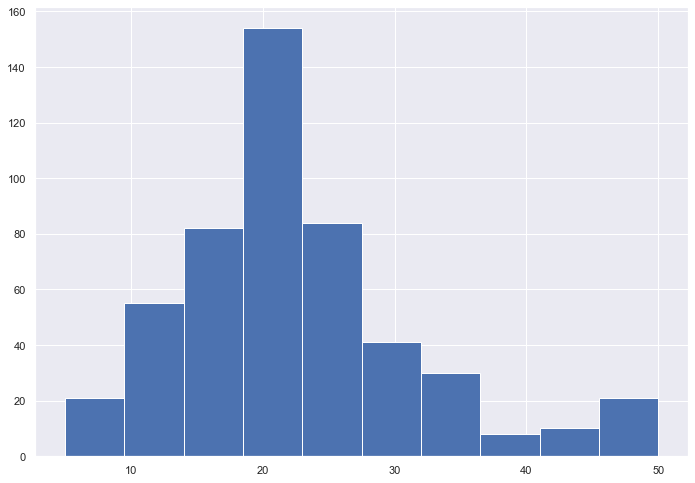

In [19]:
df_boston['MEDV'].hist()

 - Prices are look like noramlly distriuted 

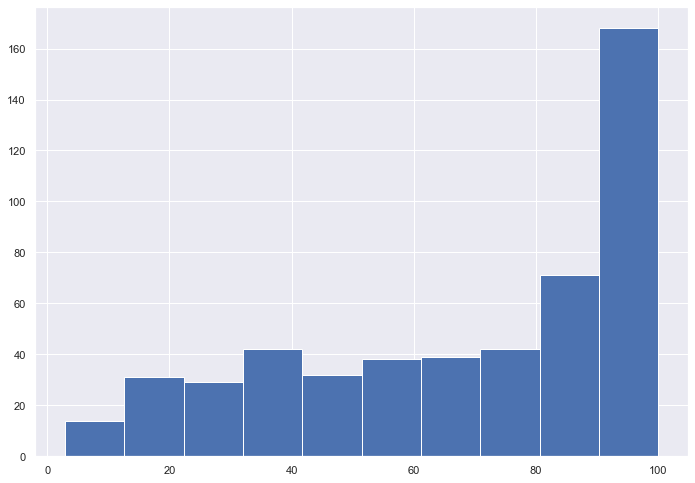

In [15]:
df_boston['AGE'].hist()

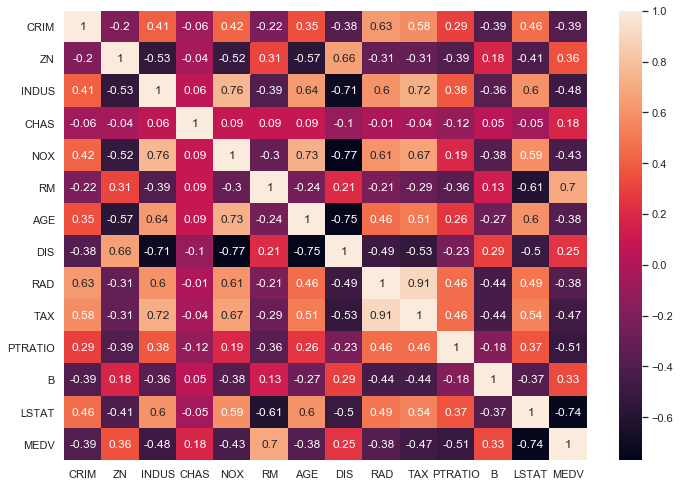

In [16]:
correlation_matrix = df_boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

##### Corelation Observation 
  - Target (MEDV) is positive corelate with RM(0.7) and negative corelate with LSTAT(-0.74)
  - HIghest corelation between RAD & TAX(0.91)
  - Other features are also corelated with each other like DIS with NOX(Negative),AGE with Nox(Positive)Indux with Nox and       TAX etc

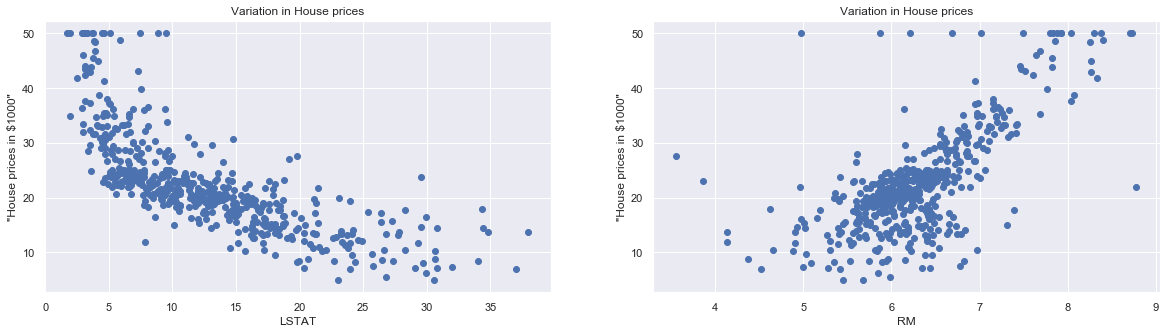

In [18]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df_boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

Lets first check and predict the price(MEDV) using RM

In [21]:
#As algorithm need np array so convert feature (RM)and Target(MEDV) in np array

X = np.array(df_boston.RM).reshape(-1,1)
y = np.array(df_boston.MEDV).reshape(-1,1)

print(X.shape)
print(y.shape)

(506, 1)
(506, 1)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 1)
(127, 1)
(379, 1)
(127, 1)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#Performance measure – Accuracy
from sklearn.metrics import accuracy_score

reg_1 = LinearRegression()
reg_1.fit(X_train, y_train)

y_pred = reg_1.predict(X_train)

#print ("Accuracy : ", accuracy_score(y_test, y_pred))
rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2 = round(reg_1.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.734045386160156
R2 score is 0.47


#### Use model for all features 

In [27]:
X = boston_dataset.data
y = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




##### Only RM(Room) isnot enough for correct prediction